In [201]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [202]:
#Importing Data set
sale=pd.read_excel("C:\\Users\\Prateek\\Desktop\\Tranzita\\SaleData.xlsx")

# Overview of the Dataset

In [203]:
sale.head(3)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0


In [204]:
sale.tail(3)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
42,2019-12-21,Central,Martha,Steven,Home Theater,28.00,500.000,14000.00
43,NaT,NaN,NaN,NaN,NaN,278.00,1125.000,62550.00
44,NaT,NaN,NaN,NaN,NaN,34.75,140.625,7818.75


In [205]:
sale.shape

(45, 8)

# Handling Missing Values

In [206]:
sale.isnull().sum()

OrderDate     2
Region        2
Manager       2
SalesMan      2
Item          2
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

In [207]:
sale_new=sale.dropna()

In [208]:
sale_new.shape

(43, 8)

In [209]:
sale_new.head(3)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0


In [210]:
sale_new.tail(3)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
40,2019-11-17,Central,Hermann,Luis,Home Theater,11.0,500.0,5500.0
41,2019-12-04,Central,Hermann,Luis,Home Theater,94.0,500.0,47000.0
42,2019-12-21,Central,Martha,Steven,Home Theater,28.0,500.0,14000.0


In [211]:
sale_new.isnull().sum()

OrderDate     0
Region        0
Manager       0
SalesMan      0
Item          0
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

# Exploratory Data Analysis



In [212]:
sale_new.describe()

,Units,Unit_price,Sale_amt
count,43.000000,43.000000,43.000000
mean,49.325581,581.011628,30364.546512
std,30.078248,442.285830,32424.588323
min,2.000000,58.500000,250.000000
25%,27.500000,225.000000,3978.000000
50%,53.000000,500.000000,17100.000000
75%,74.500000,1198.000000,42529.000000
max,96.000000,1198.000000,113810.000000


In [213]:
sale_new['OrderDate'].min()

Timestamp('2018-01-06 00:00:00')

In [214]:
sale_new['OrderDate'].max()

Timestamp('2019-12-21 00:00:00')

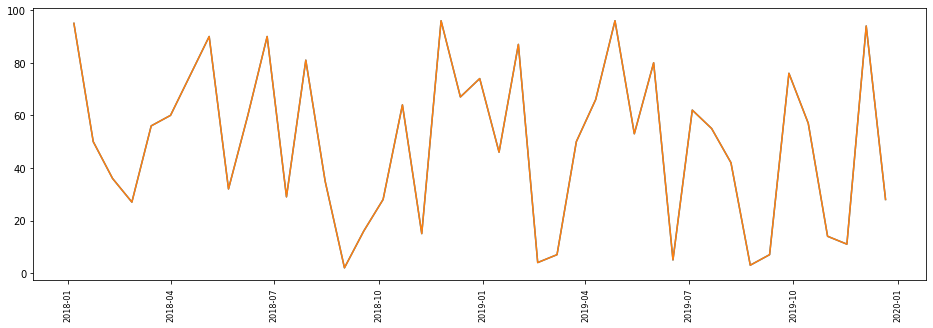

In [216]:
plt.figure(figsize=(16, 5))
plt.plot(sale_new['OrderDate'], sale_new['Units'], )
plt.xticks(rotation='vertical', size=8)
plt.plot(sale_new['OrderDate'],sale_new['Units'])


In [217]:
sale_new['Item']

0       Television
1     Home Theater
2       Television
3       Cell Phone
4       Television
5     Home Theater
6       Television
7       Television
8       Television
9     Home Theater
10      Television
11    Home Theater
12    Home Theater
13      Television
14            Desk
15     Video Games
16    Home Theater
17      Cell Phone
18      Cell Phone
19     Video Games
20      Television
21     Video Games
22    Home Theater
23    Home Theater
24    Home Theater
25    Home Theater
26     Video Games
27      Television
28      Cell Phone
29      Television
30    Home Theater
31            Desk
32     Video Games
33     Video Games
34     Video Games
35            Desk
36      Television
37      Cell Phone
38    Home Theater
39      Television
40    Home Theater
41    Home Theater
42    Home Theater
Name: Item, dtype: object

In [218]:
pd.sale_new.groupby('Item').sum()['Units']

AttributeError: module 'pandas' has no attribute 'sale_new'

In [219]:
prod_sales = pd.DataFrame(sale_new.groupby('Item').sum()['Sale_amt'])

In [220]:
prod_sales.sort_values(by=['Sale_amt'], inplace=True, ascending=False)

In [221]:
prod_sales

,Sale_amt
Item,
Television,857768.0
Home Theater,361000.0
Cell Phone,62550.0
Video Games,23107.5
Desk,1250.0


# Most Selling Product

In [222]:
best_selling_prods = pd.DataFrame(sale_new.groupby('Item').sum()['Units'])
best_selling_prods

,Units
Item,
Cell Phone,278.0
Desk,10.0
Home Theater,722.0
Television,716.0
Video Games,395.0


In [223]:
best_selling_prods.sort_values(by=['Units'], inplace=True, ascending=False)
best_selling_prods

,Units
Item,
Home Theater,722.0
Television,716.0
Video Games,395.0
Cell Phone,278.0
Desk,10.0


# Best Manager and Salesman

In [224]:
sale_new.columns

Index(['OrderDate', 'Region', 'Manager', 'SalesMan', 'Item', 'Units',
       'Unit_price', 'Sale_amt', 'Month_Year'],
      dtype='object')

<AxesSubplot:xlabel='Manager', ylabel='Sale_amt'>

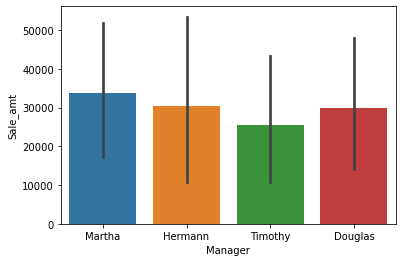

In [225]:
# Manager versus their revenue generated 

sale_manager = sale_new.groupby(['Manager'], as_index=False)['Sale_amt'].sum().sort_values(by='Sale_amt', ascending=False)

sns.barplot(x = 'Manager',y= 'Sale_amt' ,data = sale_new)

<AxesSubplot:xlabel='SalesMan', ylabel='Sale_amt'>

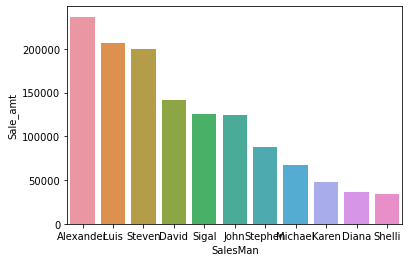

In [226]:
sales_man = sale_new.groupby(['SalesMan'], as_index=False)['Sale_amt'].sum().sort_values(by='Sale_amt', ascending=False)

sns.barplot(data = sales_man, x = 'SalesMan',y= 'Sale_amt')


# Product Category


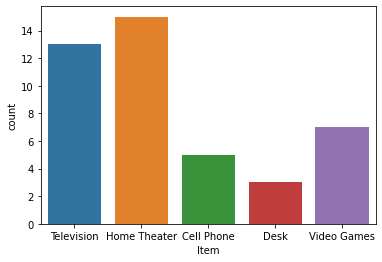

In [229]:
#Most Selling Products
ax = sns.countplot(data = sale_new, x = 'Item')
